In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from logistic_regression import LogisticRegression

In [2]:
np.random.seed(0)

dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = np.array(dataset.loc[:, 'Pregnancies':'Age'])
y = np.array(dataset.loc[:, dataset.columns == 'Outcome'])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train, learning_rate=0.005, epochs=85)

### Predicting

In [11]:
y_pred = model.predict(X_test)
print(y_pred.tolist())

[[0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [0], [1], [1], [0], [0], [1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [1], [1], [0], [0], [1], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [1], [0], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [1], [1], [0], [1], [0], [1], [0], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [0], [1], [1], [0], [0], [1], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [1], [0], [1], [1], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0]]


### Confusion matrix

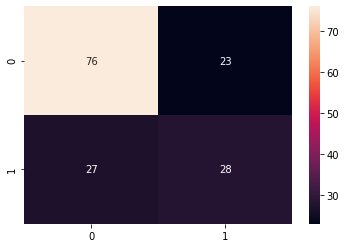

In [9]:
cf_matrix = model.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True);

### Metrics

In [10]:
recall = model.recall_score(y_test, y_pred)
precision = model.precision_score(y_test, y_pred)
f1 = model.f1_score(y_test, y_pred)
print("Precision =", precision)
print("Recall =", recall)
print("F1-score =", f1)

Precision = 0.5490196078431373
Recall = 0.509090909090909
F1-score = 0.5283018867924528


## Let's compare to sklearn's result

In [23]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

In [21]:
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train);

In [22]:
y_pred_sklearn = sklearn_model.predict(X_test)

In [24]:
print("Precision =", sklearn.metrics.precision_score(y_test, y_pred_sklearn))
print("Recall =", sklearn.metrics.recall_score(y_test, y_pred_sklearn))
print("F1-score =", sklearn.metrics.f1_score(y_test, y_pred_sklearn))

Precision = 0.6379310344827587
Recall = 0.6727272727272727
F1-score = 0.6548672566371682
